In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# git pull | git add . | git commit -m "update" | git push

In [9]:
# Read the file

df = pd.read_csv('CollegeFootballRankings24to20.csv')
df_cfb = pd.DataFrame(df)

home_team = df_cfb[df_cfb['home_game'] == 'True']
away_team = df_cfb[df_cfb['home_game'] == 'False']


df_cfb.sort_values(by = 'Team_id')


,Team,date,Team_id,opponent,win_loss,OT,OT_num,pass,rush,rec,...,home_game,week,season,CONF,SOR,FPI,AP/CFP,SOS,GC,AVGWP
5762,Auburn Tigers,"Sat, Nov 6",2,Texas A&M,L,False,NaN,153.0,69.0,50.0,...,FALSE,10,2021,SEC,48,20,--,4,29,58
3122,Auburn Tigers,"Sat, Oct 24",2,Ole Miss,W,False,NaN,238.0,129.0,150.0,...,FALSE,-2,2020,SEC,30,19,--,5,40,67
5199,Auburn Tigers,"Sat, Oct 26",2,Kentucky,W,False,NaN,172.0,278.0,53.0,...,FALSE,9,2024,SEC,64,31,--,33,47,65
6126,Auburn Tigers,"Sat, Oct 15",2,Ole Miss,L,False,NaN,140.0,179.0,46.0,...,FALSE,7,2022,SEC,47,42,--,1,43,84
6428,Auburn Tigers,"Sat, Sep 24",2,Missouri,W,True,1.0,127.0,46.0,74.0,...,TRUE,4,2022,SEC,47,42,--,1,43,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,Wyoming Cowboys,"Sat, Sep 16",2751,Texas,L,False,NaN,136.0,110.0,62.0,...,FALSE,3,2023,Mountain West,46,74,--,79,59,44
8531,Wyoming Cowboys,"Thu, Nov 19",2751,Bye,Bye,False,NaN,0.0,0.0,0.0,...,Bye,3,2020,Mountain West,100,73,--,117,95,74
8210,Wyoming Cowboys,"Sat, Nov 05",2751,Bye,Bye,False,NaN,0.0,0.0,0.0,...,Bye,11,2022,Mountain West,82,102,--,103,106,87
7661,Wyoming Cowboys,"Sat, Aug 31",2751,Arizona State,L,False,NaN,42.0,43.0,23.0,...,FALSE,1,2024,Mountain West,119,113,--,97,124,125


# Passing, Rushing and Receiving yards gained

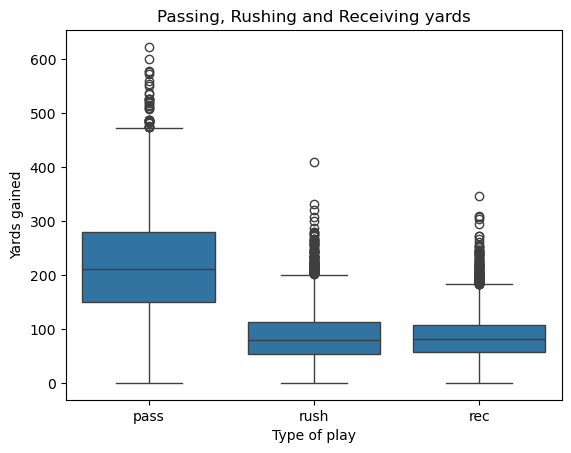

In [46]:
# Create a boxplot comparing passing and rushing yards.
df_cfb_long = pd.melt(df_cfb, value_vars=['pass', 'rush', 'rec'], var_name='type', value_name='yards')

df_cfb_long['yards'] = pd.to_numeric(df_cfb_long['yards'], errors='coerce')

sb.boxplot(data=df_cfb_long, x='type', y='yards')

plt.title('Passing, Rushing and Receiving yards')
plt.xlabel('Type of play')
plt.ylabel('Yards gained')

plt.show()

# Descriptive Statistics

In [45]:
mean_points_scored = df_cfb.groupby('home_game')['points_scored'].describe()
print(mean_points_scored)

mean_points_allowed = df_cfb.groupby('home_game')['points_allowed'].describe()
print(mean_points_allowed)


            count       mean        std  min   25%   50%   75%    max
home_game                                                            
False      3128.0  28.231138  34.440244  0.0  16.0  24.0  34.0  522.0
True       3929.0  32.516671  29.642787  0.0  20.0  30.0  41.0  577.0
            count       mean        std  min   25%   50%   75%    max
home_game                                                            
False      3128.0  31.286125  28.243351  0.0  20.0  29.0  38.0  482.0
True       3929.0  26.734793  33.670454  0.0  14.0  23.0  34.0  522.0


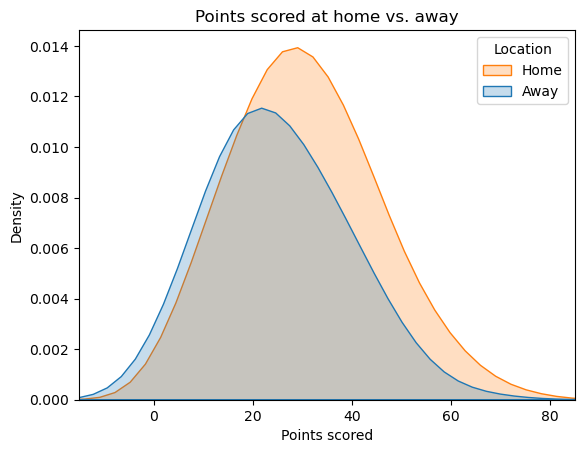

In [ ]:
# Create a scatterplot of point scored at home vs. away.
sb.kdeplot(data=df_cfb, x='points_scored',  fill = True, hue = 'home_game')

plt.title('Points scored at home vs. away')
plt.xlabel('Points scored')
plt.ylabel('Density')

labels = ['Home', 'Away']
plt.legend(title='Location', labels=labels)
plt.xlim(-15, 85)
plt.vline(x = )

plt.show()

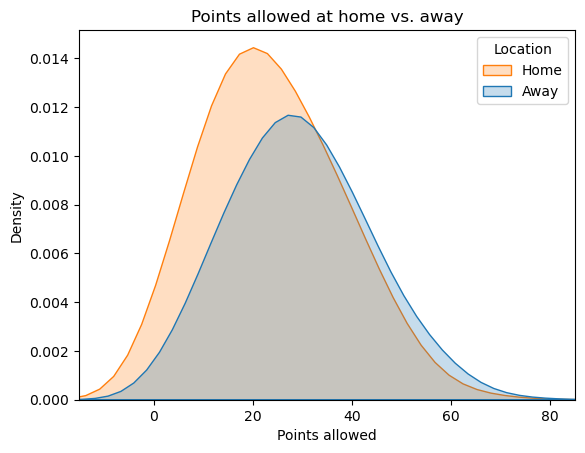

In [48]:
# Create a scatterplot of point allowed at home vs. away.
sb.kdeplot(data=df_cfb, x='points_allowed',  fill = True, hue = 'home_game')

plt.title('Points allowed at home vs. away')
plt.xlabel('Points allowed')
plt.ylabel('Density')

labels = ['Home', 'Away']
plt.legend(title='Location', labels=labels)
plt.xlim(-15, 85)

plt.show()

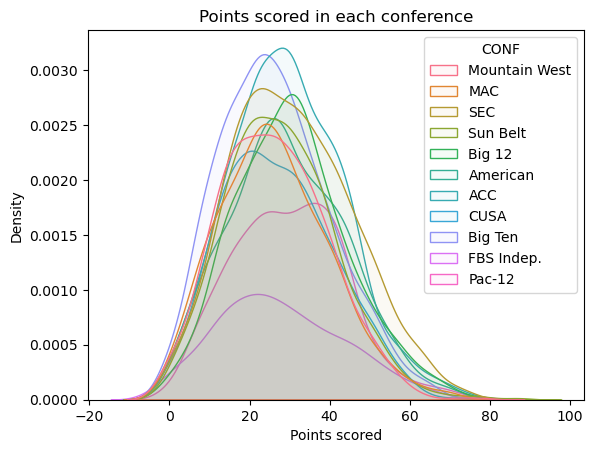

In [55]:
sb.kdeplot(data=df_cfb, x='points_scored',  fill = True, hue = 'CONF', alpha = 0.05)

plt.title('Points scored in each conference')
plt.xlabel('Points scored')
plt.ylabel('Density')

#labels = ['Home', 'Away']
#plt.legend(title='Location', labels=labels)    

plt.show()


In [5]:
import pandas as pd
import numpy as np

# --- 1. Data Loading and Cleaning ---
# Load the dataset
df = pd.read_csv('College Football Rankings.csv')

# --- 2. Date Parsing and Sorting for Chronology ---
# The original 'date' column is missing the year. We combine it with 'season' for correct parsing.
df.rename(columns={'win_loss': 'Result'}, inplace=True)

# 2a. Create a full date string: 'Month Day, Year'
# We use a regex check to ensure we only try to parse valid game dates (e.g., 'Sat, Nov 16')
df['full_date_str'] = np.where(
    df['date'].astype(str).str.contains(r'^[A-Za-z]{3},\s[A-Za-z]{3}\s\d{1,2}$', na=False),
    df['date'].astype(str).str.split(',').str[-1].str.strip() + ', ' + df['season'].astype(str),
    np.nan
)

# 2b. Convert to datetime object and handle non-game rows (like 'Bye')
df['game_date'] = pd.to_datetime(df['full_date_str'], errors='coerce')

# Filter for games that have a 'Win' or 'Loss' result and valid dates/differentials
df_games = df[df['Result'].isin(['W', 'L'])].dropna(subset=['game_date', 'point_differential'])

# Convert point_differential to numeric
df_games['point_differential'] = pd.to_numeric(df_games['point_differential'])

# Sort the DataFrame by the actual game date (Crucial for sequential Elo updates)
df_games.sort_values(by='game_date', inplace=True)

# Reset index to make iteration cleaner
df_games.reset_index(drop=True, inplace=True)


# --- 3. Elo Rating System Implementation ---

# Initialize Elo ratings for all teams
initial_elo = 1500
elo_ratings = {}

# K-factor (determines the magnitude of rating change)
K = 32

def calculate_elo_change(r_a, r_b, result, point_differential, k_factor):
    """
    Calculates the change in Elo rating for Team A, including a Margin of Victory (MoV) adjustment.
    """
    # 1. Expected Win Probability (E_A) for Team A
    e_a = 1 / (1 + 10**((r_b - r_a) / 400))

    # 2. Actual Score (S_A): 1 for Win, 0 for Loss
    s_a = 1 if result == 'W' else 0

    # 3. Margin of Victory (MoV) Multiplier
    # This is a simple adjustment to increase the K-factor for blowouts.
    # It is a common simplified MoV adjustment that scales by the point difference.
    mov_multiplier = np.log(abs(point_differential) + 1) * 2.2 / (abs(r_a - r_b) / 400 + 2.2)
    # Clamp the multiplier to prevent extreme changes on massive blowouts
    mov_multiplier = np.clip(mov_multiplier, 0.5, 3.0)

    # 4. Final Elo Change Formula: K' * (S_A - E_A)
    delta_elo = k_factor * mov_multiplier * (s_a - e_a)

    return delta_elo

# List to store the Elo ratings for merging back later
elo_history = []

# Populate initial ratings dictionary
all_teams = pd.concat([df_games['Team'], df_games['opponent']]).unique()
for team in all_teams:
    elo_ratings[team] = initial_elo

# Iterate through each game chronologically
for index, row in df_games.iterrows():
    team_a = row['Team']
    team_b = row['opponent']
    result_a = row['Result']
    diff = row['point_differential']

    # Retrieve current ratings (will be initial_elo if it's the team's first game)
    r_a = elo_ratings.get(team_a, initial_elo)
    r_b = elo_ratings.get(team_b, initial_elo)

    # Calculate Elo change for Team A
    delta_a = calculate_elo_change(r_a, r_b, result_a, diff, K)

    # Elo is a zero-sum system: Team B's change is the negative of Team A's
    delta_b = -delta_a

    # Calculate new ratings
    new_r_a = r_a + delta_a
    new_r_b = r_b + delta_b

    # Store the POST-GAME Elo rating for Team A in the history
    elo_history.append({
        'game_date': row['game_date'],
        'Team': team_a,
        'Team_Elo_Rating': new_r_a
    })

    # Update the ratings dictionary for the next game
    elo_ratings[team_a] = new_r_a
    elo_ratings[team_b] = new_r_b


# --- 4. Final Merge and Output ---

# Convert the history to a DataFrame
elo_df = pd.DataFrame(elo_history)

# Merge the new Elo ratings back into the original game data
final_df = df_games.merge(elo_df, on=['game_date', 'Team'], how='left')

# Select and display the relevant columns to show the result
final_output = final_df[[
    'season', 'game_date', 'Team', 'opponent', 'Result',
    'point_differential', 'Team_Elo_Rating'
]].sort_values(by=['game_date', 'Team'])

print("\n--- Final Output Sample (First 10 Games) ---")
print(final_output.head(10).to_string(index=False))

# Save the final DataFrame
final_output.to_csv('College_Football_Elo_Rankings.csv', index=False)


--- Final Output Sample (First 10 Games) ---
 season  game_date                      Team     opponent Result  point_differential  Team_Elo_Rating
   2020 2020-01-01      Alabama Crimson Tide   Notre Dame      W                  17      1546.245948
   2020 2020-01-01             Auburn Tigers Northwestern      L                 -16      1454.668586
   2020 2020-01-01       Cincinnati Bearcats      Georgia      L                  -3      1477.819290
   2020 2020-01-01            Clemson Tigers   Ohio State      L                 -21      1452.000000
   2020 2020-01-01          Georgia Bulldogs   Cincinnati      W                   3      1522.180710
   2020 2020-01-01     Northwestern Wildcats       Auburn      W                  16      1545.331414
   2020 2020-01-01 Notre Dame Fighting Irish      Alabama      L                 -17      1453.754052
   2020 2020-01-01       Ohio State Buckeyes      Clemson      W                  21      1548.000000
   2020 2020-01-02          Indiana 